In [2]:
import pandas as pd

In [3]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


1) Isolate the non-nulls in the *alcohol* series and assign them to the variable *wine_servings*.

In [4]:
alcohol = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['country', 'wine_servings'], index_col='country')

In [5]:
alcohol = alcohol.squeeze()
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [6]:
wine_servings = alcohol[alcohol.notnull()]
wine_servings

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

(alcohol[alcohol.notnull()]) **filters out** entire rows where any column has a null value, while the second approach (alcohol.notnull()) generates a Boolean DataFrame indicating null (False) and not null (True) values element-wise in the original DataFrame.

2) What is the total wine consumed by countries in *wine_servings*?

In [7]:
total_wine = wine_servings.sum()
total_wine

8221.0

3) In the *wine_servings* dataset, what was the total wine consumed by countries that consumed less than 100 servings?

*Hint*: apply a boolean mask to identify such countries, then sum().

In [8]:
wine_servings[ wine_servings < 100].sum()

2416.0

In [9]:
alcohol.dropna(inplace = False)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [10]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

2.1) Select all the countries from *alcohol* that have more than 50 wine servings, and save them (and the corresponding values) in a variable *fifty_plus*.

In [11]:
fifty_plus = alcohol[ alcohol >50 ]
fifty_plus

country
Albania                54.0
Andorra               312.0
Argentina             221.0
Australia             212.0
Austria               191.0
Bahamas                51.0
Belgium               212.0
Bulgaria               94.0
Chile                 172.0
Cook Islands           74.0
Croatia               254.0
Cyprus                113.0
Czech Republic        134.0
Denmark               278.0
Equatorial Guinea     233.0
Estonia                59.0
Finland                97.0
Gabon                  59.0
Georgia               149.0
Germany               175.0
Greece                218.0
Hungary               185.0
Iceland                78.0
Ireland               165.0
Italy                 237.0
Laos                  123.0
Latvia                 62.0
Lithuania              56.0
Luxembourg            271.0
Montenegro            128.0
New Zealand           175.0
Norway                129.0
Paraguay               74.0
Poland                 56.0
Portugal              339.0
Romania     

2.2) From *fifty_plus*, choose the countries with the smallest 20 wine servings values. 

In [12]:
smallest_20 = fifty_plus.sort_values().iloc[0:20]
smallest_20

country
Seychelles             51.0
Bahamas                51.0
Albania                54.0
Poland                 56.0
Lithuania              56.0
Gabon                  59.0
Estonia                59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Paraguay               74.0
Cook Islands           74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

In [13]:
fifty_plus.nsmallest(n=20)

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Estonia                59.0
Gabon                  59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Cook Islands           74.0
Paraguay               74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

In [14]:
fifty_plus.nlargest(n=20)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Australia            212.0
Belgium              212.0
United Kingdom       195.0
Austria              191.0
Sweden               186.0
Hungary              185.0
Germany              175.0
New Zealand          175.0
Chile                172.0
Romania              167.0
Name: wine_servings, dtype: float64

2.3) What is the mean, median and standard deviation for the sample from Step 2?

In [15]:
smallest_20.mean()

74.25

In [16]:
smallest_20.median()

73.5

In [17]:
smallest_20.std()

19.07292100831631

3.1) Read the drinks.csv dataset again, this time bringing in the beer_servings sequence into a new <ins>series</ins> with country again acting as the index. Assign this series to the variable *beers*.

Link to data: https://andybek.com/pandas-drinks

In [18]:
beers = pd.read_csv('https://andybek.com/pandas-drinks', usecols=['beer_servings','country'] , index_col= ['country'])
beers.head()

,beer_servings
country,
Afghanistan,NaN
Albania,89.0
Algeria,25.0
Andorra,245.0
Angola,217.0


3.2 Calculate the mean, median, and standard deviation of beer servings in *beers*. Is the distribution right or left skewed?

In [19]:
beers.describe()

,beer_servings
count,178.000000
mean,102.870787
std,100.645713
min,1.000000
25%,21.000000
50%,60.000000
75%,172.500000
max,376.000000


array([[<Axes: title={'center': 'beer_servings'}>]], dtype=object)

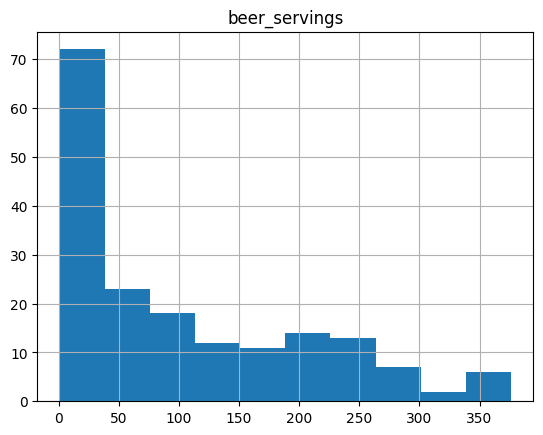

In [20]:
beers.hist()

3.3) Slice the first 10 countriees from *beers*. Are these relatively large or small relative to the rest of the sample?

**BONUS**: To answer that, we could compare each value to the mean or median. An even
better approach would be to calculate standard scores, or z-scores as they 
are known.

In [21]:
beers.iloc[0:10]

,beer_servings
country,
Afghanistan,NaN
Albania,89.0
Algeria,25.0
Andorra,245.0
Angola,217.0
Antigua & Barbuda,12.0
Argentina,193.0
Armenia,21.0
Australia,261.0


In [22]:
beers.mean()

beer_servings    102.870787
dtype: float64

In [23]:
beers.iloc[0:10] - beers.mean()

,beer_servings
country,
Afghanistan,NaN
Albania,-13.870787
Algeria,-77.870787
Andorra,142.129213
Angola,114.129213
Antigua & Barbuda,-90.870787
Argentina,90.129213
Armenia,-81.870787
Australia,158.129213


In [34]:
(beers.iloc[:10] - beers.mean()).applymap(lambda x:'low' if x<0 else 'high')

,beer_servings
country,
Afghanistan,high
Albania,low
Algeria,low
Andorra,high
Angola,high
Antigua & Barbuda,low
Argentina,high
Armenia,low
Australia,high


apply: This method is used for applying a function along the axis of a DataFrame (either row-wise or column-wise). It can be used on both Series and DataFrames. The function passed to apply is applied to each column (or row) as a whole, and the result is a Series (if applied to columns) or a DataFrame (if applied to rows)

result_series = df.apply(func, axis=0)  # Apply function to each column
result_dataframe = df.apply(func, axis=1)  # Apply function to each row

applymap: This method is specifically used for element-wise operations on DataFrames. It applies a function to each individual element of the DataFrame, regardless of whether it's a Series or a DataFrame. It's most commonly used for mapping a function to every element in the DataFrame.

result_dataframe = df.applymap(func)  # Apply function to each element

In [36]:
(beers - beers.mean()).applymap(lambda x:'low' if x<0 else 'high').value_counts()

beer_servings
low              112
high              81
Name: count, dtype: int64